
**Problem** **Statement**


##*Jantahack Cross-sell Prediction*



The Problem statement is [here](https://datahack.analyticsvidhya.com/contest/janatahack-cross-sell-prediction/#ProblemStatement).

**Data Description**
	              
- id	       :            Unique ID for the customer
- Gender	      :         Gender of the customer
- Age           :          Age of the customer
- Driving_License	0 : Customer does not have DL, 1 : Customer already has DL.
- Region_Code	: Unique code for the region of the customer
- Previously_Insured	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Age	-   Age of the Vehicle 
- Vehicle_Damage
1 : Customer got his/her vehicle damaged in the past.
0 : Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium	The amount customer needs to pay as premium in the year
- Policy_Sales_Channel	Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage -	Number of Days, Customer has been associated with the company
- Response	1 :  Customer is interested, 0 : Customer is not interested

In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Loading** **the** **train** **data** 

In [42]:
df=pd.read_csv('/content/drive/My Drive/hacathon/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [43]:
#Deleting unwanted column
del df['id']

In [44]:
df.shape

(381109, 11)

In [45]:
#Checking the null values
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


**Loading the test data**

In [47]:
df_test=pd.read_csv('/content/drive/My Drive/hacathon/test.csv')
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [48]:
df_test.shape

(127037, 11)

In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


**Data preprocessing**

In [70]:
#Replacing categorical  with numerical values for both train and test
df['Gender']=df['Gender'].replace(['Male','Female'],[1,0])
df['Vehicle_Age']=df['Vehicle_Age'].replace(['< 1 Year','1-2 Year','> 2 Years'],[0,1,2])
df['Vehicle_Damage']=df['Vehicle_Damage'].replace(['Yes','No'],[1,0])


df_test['Gender']=df_test['Gender'].replace(['Male','Female'],[1,0])
df_test['Vehicle_Age']=df_test['Vehicle_Age'].replace(['< 1 Year','1-2 Year','> 2 Years'],[0,1,2])
df_test['Vehicle_Damage']=df_test['Vehicle_Damage'].replace(['Yes','No'],[1,0])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [51]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [52]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


**Data Visualization**

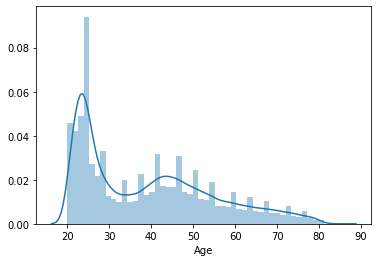

In [54]:
sns.distplot(df['Age'])
plt.show()

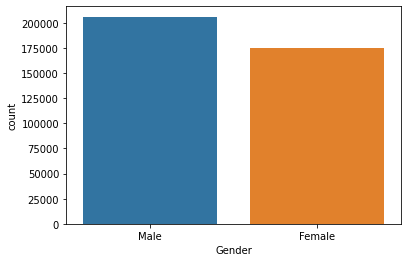

In [55]:
sns.countplot(df['Gender']);

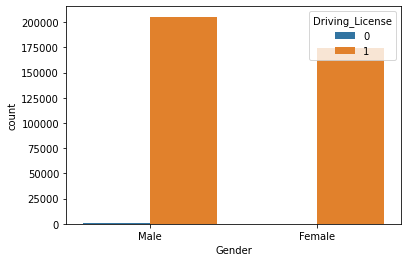

In [56]:
sns.countplot(df['Gender'],hue=df['Driving_License']);

<Figure size 720x720 with 0 Axes>

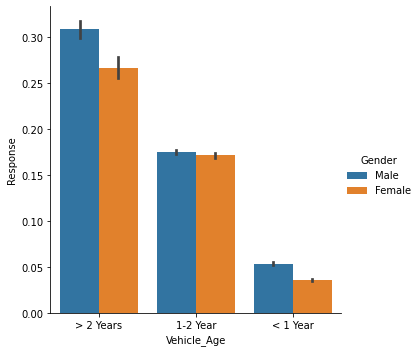

In [58]:
plt.figure(figsize=(10,10))
sns.catplot(x="Vehicle_Age", y="Response", hue="Gender", kind="bar", data=df);





*    People whose vehicle age is < 2 years tends to buy insurance compared to others.







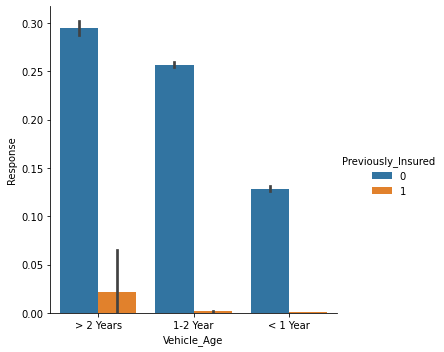

In [59]:
sns.catplot(x="Vehicle_Age", y="Response", hue="Previously_Insured", kind="bar", data=df);





*   Previously_Insured



*   1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have      Vehicle Insurance
*   Most of the people who have insured doesnt want to insure it again.




 





 









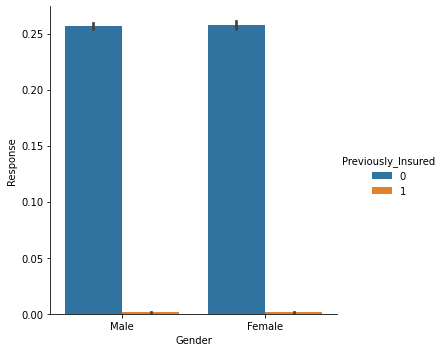

In [61]:
sns.catplot(x="Gender", y="Response", hue="Previously_Insured", kind="bar", data=df.query("Vehicle_Age == '1-2 Year'"));



*   Vehicle_Age is between 1-2 years.
*   insurance was very less.


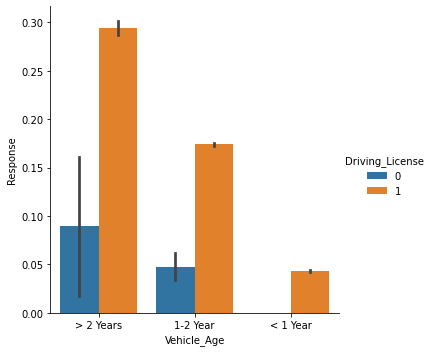

In [62]:
sns.catplot(x="Vehicle_Age", y="Response", hue="Driving_License", kind="bar", data=df);

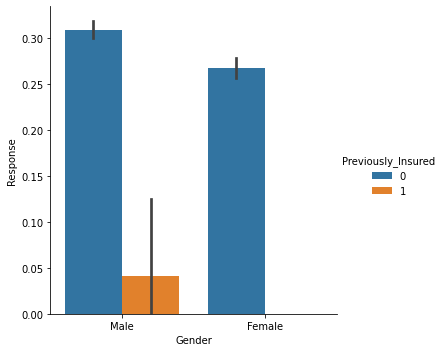

In [63]:
sns.catplot(x="Gender", y="Response", hue="Previously_Insured", kind="bar", data=df.query("Vehicle_Age == '> 2 Years'"));


*   Vehicle_age > 2 years.
*   previous insurance was very less which is vehicle age > 2 years.


**Finding the outliers and removing them**

In [64]:
df['Annual_Premium'].max(),df['Annual_Premium'].min()

(540165.0, 2630.0)

In [65]:
def outliers(df,features):
  for c in features:
    Q1=np.percentile(df[c],25)
    Q3=np.percentile(df[c],75)
    IQR=Q3-Q1
    outliers=df[(df[c] < (Q1-1.5 * IQR)) | (df[c] > (Q3 + 1.5 * IQR))]
    return outliers.index

In [66]:
outliers(df,['Annual_Premium'])

Int64Index([    25,     37,     67,    139,    149,    167,    176,    216,
               310,    315,
            ...
            380655, 380733, 380761, 380815, 380860, 380959, 380998, 381035,
            381047, 381079],
           dtype='int64', length=10320)

In [67]:
len(df)

381109

In [68]:
df.drop(labels=outliers(df,['Annual_Premium']),inplace=True)

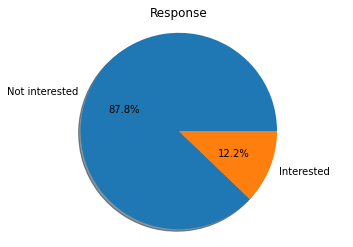

In [69]:
labels=['Not interested','Interested']
sizes=[df['Response'].value_counts()]
fig1,ax1=plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set_title('Response')
plt.show()

In [71]:
X=df.drop(['Response'],axis=1)
y=df.Response.values

In [72]:
X.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [73]:
y


array([1, 0, 1, ..., 0, 0, 0])



*  Balancing the dataset as it was imbalanced


In [74]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [75]:
X_res,y_res=sm.fit_sample(X,y)

In [76]:
X_res.shape,y_res.shape

((651268, 10), (651268,))

In [77]:
from collections import Counter
print("Orginal Dataset Shape {}".format(Counter(y)))
print("Applying Smote dataset shape {}".format(Counter(y_res)))

Orginal Dataset Shape Counter({0: 325634, 1: 45155})
Applying Smote dataset shape Counter({1: 325634, 0: 325634})


**Model Building**

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=23,stratify=y_res,shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455887, 10)
(195381, 10)
(455887,)
(195381,)


**Feature Scaling**

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [80]:
X_train_res=sc.fit_transform(X_train)
X_test_res=sc.transform(X_test)

**Randomforest**

In [81]:
 from sklearn.ensemble import RandomForestClassifier
 rf=RandomForestClassifier()
 model=rf.fit(X_train_res,y_train)


In [82]:
y_pred=model.predict(X_test_res)

In [84]:
 from sklearn.metrics import accuracy_score
 accuracy_score(y_test,y_pred)

0.9162764035397505

**Now,lets try with Xgboost**



In [85]:
!pip install xgboost

In [86]:
from xgboost import  XGBClassifier
xg=XGBClassifier()

In [87]:
model=xg.fit(X_train_res,y_train)

In [88]:
y_pred=model.predict(X_test_res)

In [104]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,f1_score,classification_report,plot_confusion_matrix

In [90]:
accuracy_score(y_test,y_pred)

0.8648384438609691

In [91]:
precision_score(y_test,y_pred)

0.8276927320369604

**catboost**

In [92]:
 !pip install catboost

     |████████████████████████████████| 66.1MB 42kB/s 


In [96]:
 from catboost import CatBoostClassifier
 cb=CatBoostClassifier()

In [97]:

model_cb=cb.fit(X_train_res,y_train)

 

Learning rate set to 0.140691
0:	learn: 0.4836752	total: 145ms	remaining: 2m 25s
1:	learn: 0.4055048	total: 274ms	remaining: 2m 16s
2:	learn: 0.3528990	total: 406ms	remaining: 2m 14s
3:	learn: 0.3228491	total: 540ms	remaining: 2m 14s
4:	learn: 0.3125648	total: 668ms	remaining: 2m 12s
5:	learn: 0.3054911	total: 801ms	remaining: 2m 12s
6:	learn: 0.2976520	total: 930ms	remaining: 2m 11s
7:	learn: 0.2952213	total: 1.07s	remaining: 2m 12s
8:	learn: 0.2880415	total: 1.21s	remaining: 2m 13s
9:	learn: 0.2839031	total: 1.34s	remaining: 2m 13s
10:	learn: 0.2818412	total: 1.46s	remaining: 2m 11s
11:	learn: 0.2803928	total: 1.59s	remaining: 2m 10s
12:	learn: 0.2784361	total: 1.72s	remaining: 2m 10s
13:	learn: 0.2769166	total: 1.84s	remaining: 2m 9s
14:	learn: 0.2750227	total: 1.97s	remaining: 2m 9s
15:	learn: 0.2717534	total: 2.11s	remaining: 2m 9s
16:	learn: 0.2700567	total: 2.25s	remaining: 2m 10s
17:	learn: 0.2655194	total: 2.39s	remaining: 2m 10s
18:	learn: 0.2601283	total: 2.52s	remaining: 2m

In [98]:
 y_pred=model_cb.predict(X_test_res)

In [99]:
 accuracy_score(y_test,y_pred)

0.9274699177504465

In [100]:
print("Accuarcy on training", accuracy_score(y_train,model_cb.predict(X_train_res)))
print("Accuarcy on testing",accuracy_score(y_test,model_cb.predict(X_test_res)))

Accuarcy on training 0.9308512855159283
Accuarcy on testing 0.9274699177504465


In [101]:
 precision_score(y_test,y_pred)

0.9922206506364922

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     97690
           1       0.99      0.86      0.92     97691

    accuracy                           0.93    195381
   macro avg       0.93      0.93      0.93    195381
weighted avg       0.93      0.93      0.93    195381



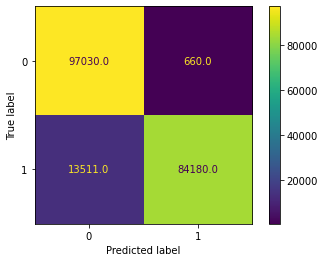

In [107]:
print(plot_confusion_matrix(model_cb,X_test_res,y_test,values_format='.1f'))
plt.show()

In [108]:
cb_probs=model_cb.predict_proba(X_test_res)[:,1]
cb_probs

array([0.99964302, 0.09461105, 0.94614687, ..., 1.        , 0.99999996,
       1.        ])

In [109]:
cb_auc=roc_auc_score(y_test,cb_probs)
print("cb_area",cb_auc)

cb_area 0.9794134492025434


In [110]:
fpr,tpr,th=roc_curve(y_test,cb_probs)

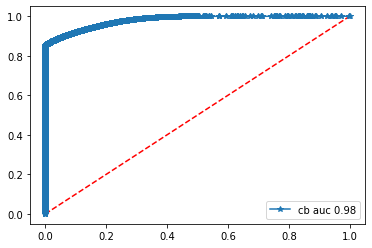

In [113]:
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.plot(fpr,tpr,marker='*',label='cb auc {}'.format(cb_auc.round(2)))
plt.legend()
plt.show()

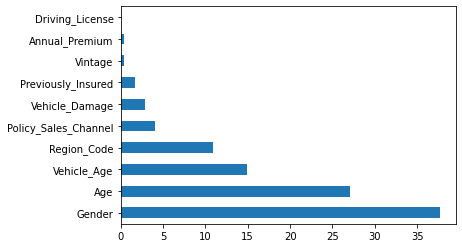

In [116]:
feat_importances = pd.Series(model_cb.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

I have given a try with LGBM also

In [117]:
!pip install lightgbm


In [118]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [119]:
lgb=LGBMClassifier()
model_lgb=lgb.fit(X_train_res,y_train)

In [120]:
y_pred=model_lgb.predict(X_test_res)

In [121]:
accuracy_score(y_test,y_pred)

0.9178067468177561

In [122]:
precision_score(y_test,y_pred)

0.9620435146822433

**catboost  gives more accuracy**

**predictions**

In [123]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,0,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,0,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,0,0,59097.0,152.0,297


In [124]:
df_test_copy=df_test.copy()

In [125]:
df_test_copy.drop('id',axis=1,inplace=True)

In [126]:
df_test_copy.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [127]:
df_test_copy=sc.transform(df_test_copy)

In [128]:
df_test_copy

array([[ 0.93555715, -1.13346144,  0.04162401, ...,  0.41024974,
         0.86770373, -1.21466688],
       [ 0.93555715, -0.04235041,  0.04162401, ...,  0.276304  ,
        -1.74390612, -0.51870855],
       [ 0.93555715,  0.46683473,  0.04162401, ...,  0.69243582,
         0.36339286,  0.53722823],
       ...,
       [ 0.93555715, -1.42442439,  0.04162401, ...,  0.01423624,
         0.86770373, -0.96268196],
       [ 0.93555715,  2.21261238,  0.04162401, ...,  2.20296524,
        -1.40169518,  1.32918082],
       [ 0.93555715,  0.03039032,  0.04162401, ..., -0.10984887,
         0.36339286,  0.92120524]])

In [130]:
predictions=model_cb.predict_proba(df_test_copy)[:,1]

In [131]:
predictions

array([7.38160894e-04, 3.98819648e-01, 3.19449258e-01, ...,
       2.41695545e-04, 2.02456814e-04, 1.18565591e-03])

In [132]:
final=pd.DataFrame()
final['id']=df_test['id']
final['Response']=predictions

In [133]:
final

,id,Response
0,381110,0.000738
1,381111,0.398820
2,381112,0.319449
3,381113,0.005849
4,381114,0.000069
...,...,...
127032,508142,0.000365
127033,508143,0.373294
127034,508144,0.000242
127035,508145,0.000202


In [134]:
final.to_csv('catb_final.csv',index=False)